In [87]:
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [88]:
#read trajectories from folder bags

jar_pose = [[0.5106467604637146, 0.3306705355644226, 0.11027072370052338],
           [0.3776182532310486, 0.34300878643989563, 0.11026414483785629],
[0.26126930117607117, 0.339559942483902, 0.11066635698080063],
[0.12617428600788116, 0.34380239248275757, 0.1104840412735939],
[0.3326364755630493, -0.13827505707740784, 0.13367746770381927]]

jars = [1, 1, 1, 0, 1, 1, 2, 2, 2, 3, 1, 0, 0, 2, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 2, 0, 0, 0, 3, 2, 1, 1, 1, 3, 2, 1]
ice_cream_pose = [0.3326364755630493, -0.13827505707740784, 0.13367746770381927]
nop = 39
trajectories = []
progresses = []
steps = []
scalars = []
ind = []
jars = []
for i in range(nop):
    #print(i)
    traj = []
    step = []
    progress = []
    scalar = []
    jar = []
    
    pose_path = "bags/user_"+str(i)+"/0_poses.txt"
    step_path = "bags/user_"+str(i)+"/0_step.txt"
    progress_path = "bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z, grip = map(float, line.strip().split())
            traj.append([x, y, z, grip])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)


    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))
print(np.sum(steps))

32
32
32
32
13313


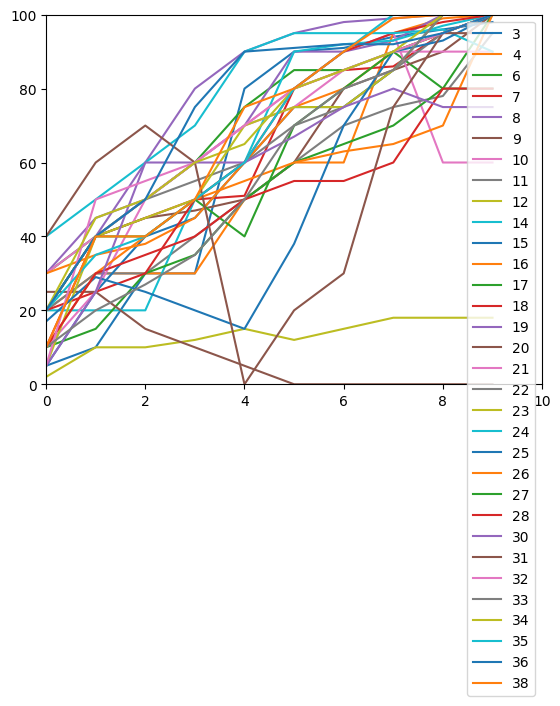

In [89]:
# plot progress
fig, ax = plt.subplots()
for i in range(len(progresses)):
    ax.plot(progresses[i], label=str(ind[i]))
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
plt.savefig('progress.png')
plt.show()



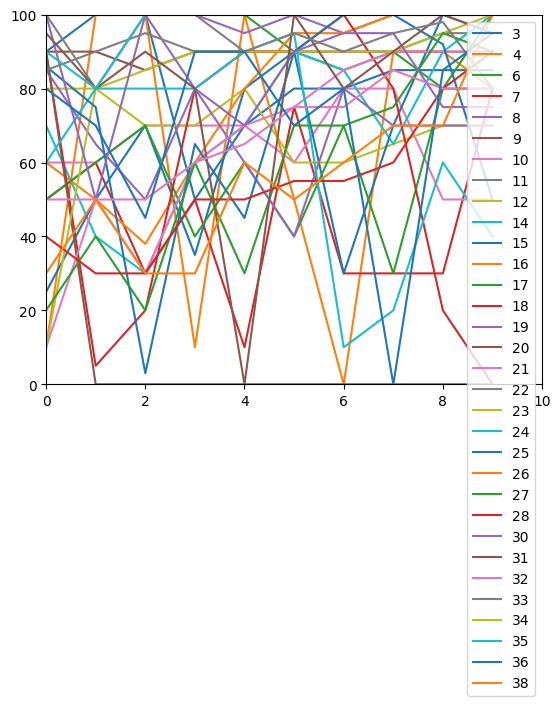

In [90]:
# plot scalar
fig, ax = plt.subplots()
for i in range(len(scalars)):
    ax.plot(scalars[i], label=str(ind[i]))
ax.legend()
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
plt.savefig('scalar.png')
plt.show()


(0.0, 100.0)

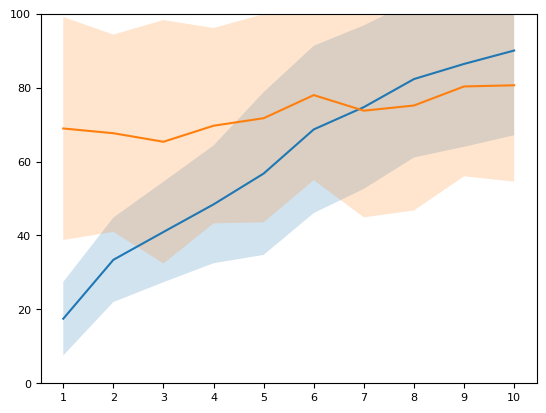

In [91]:
#plot mean with std for pro and pre

# Set the font size to match IEEE standard
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8, 'legend.fontsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

mean_pro = np.mean(progresses, axis=0)
std_pro = np.std(progresses, axis=0)
mean_pre = np.mean(scalars, axis=0)
std_pre = np.std(scalars, axis=0)


fig, ax = plt.subplots()
ax.plot(mean_pro, label='progress')
ax.fill_between(range(len(mean_pro)), mean_pro-std_pro, mean_pro+std_pro, alpha=0.2)
ax.plot(mean_pre, label='scalar')
ax.fill_between(range(len(mean_pre)), mean_pre-std_pre, mean_pre+std_pre, alpha=0.2)

#set labels from 1 to 10
ax.set_xticks(range(10))
ax.set_xticklabels(range(1, 11))
ax.set_ylim(0, 100)


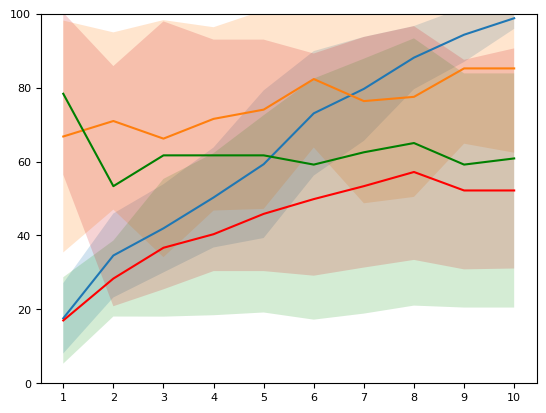

32


In [120]:
progresses_suc = [progresses[i] for i in range(len(progresses)) if progresses[i][-1] >=90]
scalars_suc = [scalars[i] for i in range(len(scalars)) if progresses[i][-1] >=90]

mean_pro_suc = np.mean(progresses_suc, axis=0)
std_pro_suc = np.std(progresses_suc, axis=0)
mean_pre_suc = np.mean(scalars_suc, axis=0)
std_pre_suc = np.std(scalars_suc, axis=0)

fig, ax = plt.subplots()
ax.plot(mean_pro_suc, label='progress')
ax.fill_between(range(len(mean_pro_suc)), mean_pro_suc-std_pro_suc, mean_pro_suc+std_pro_suc, alpha=0.2)
ax.plot(mean_pre_suc, label='scalar')
ax.fill_between(range(len(mean_pre_suc)), mean_pre_suc-std_pre_suc, mean_pre_suc+std_pre_suc, alpha=0.2)

#plot failed
progresses_fail = [progresses[i] for i in range(len(progresses)) if progresses[i][-1] <90]
scalars_fail = [scalars[i] for i in range(len(scalars)) if progresses[i][-1] <90]


mean_pro_fail = np.mean(progresses_fail, axis=0)
std_pro_fail = np.std(progresses_fail, axis=0)
mean_pre_fail = np.mean(scalars_fail, axis=0)
std_pre_fail = np.std(scalars_fail, axis=0)

ax.plot(mean_pro_fail, 'r', label='progress_fail')
ax.fill_between(range(len(mean_pro_fail)), mean_pro_fail-std_pro_fail, mean_pro_fail+std_pro_fail, alpha=0.2)
ax.plot(mean_pre_fail, 'g', label='scalar_fail')
ax.fill_between(range(len(mean_pre_fail)), mean_pre_fail-std_pre_fail, mean_pre_fail+std_pre_fail, alpha=0.2)

# for pf in progresses_fail:
#     ax.plot(pf, 'r')

# for sf in scalars_fail:
#     ax.plot(sf, 'g')


ax.set_xticks(range(10))
ax.set_xticklabels(range(1, 11))
ax.set_ylim(0, 100)

plt.show()




print(len(progresses))




11.600310427564656


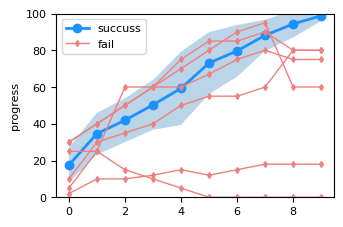

In [119]:
# plot pro suc and pro fail together
# Width and height for a double-column figure in IEEE format
fig_width = 7.16 /2  # width in inches
fig_height = (fig_width / 36) * 24 # height in inches to maintain 9:6 ratio for each subplot
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.plot(mean_pro_suc, c = 'dodgerblue', marker='o', markersize=6, linewidth=2, label='succuss')
ax.fill_between(range(len(mean_pro_suc)), mean_pro_suc-std_pro_suc, mean_pro_suc+std_pro_suc, alpha=0.3)
#plot dots for the line
#ax.scatter(range(len(mean_pro_suc)), mean_pro_suc, c='dodgerblue', s=40)

# ax.plot(mean_pro_fail, 'r', label='progress_fail')
# ax.fill_between(range(len(mean_pro_fail)), mean_pro_fail-std_pro_fail, mean_pro_fail+std_pro_fail, alpha=0.2)

for pf in progresses_fail:
    ax.plot(pf, 'lightcoral', marker = "d", markersize = 3, linewidth=1, label='fail')


# remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('progress')
ax.set_ylim(0, 100)
print(np.mean(std_pro_suc))
plt.savefig('pro_suc_fail.png', dpi = 1000, bbox_inches='tight')
plt.show()



25.549065006474123


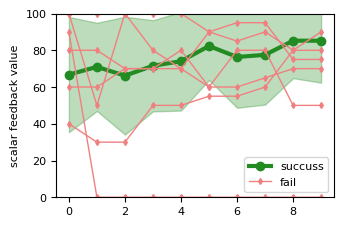

In [118]:
#plot pre suc and pre fail together
fig_width = 7.16 /2  # width in inches
fig_height = (fig_width / 36) * 24 # height in inches to maintain 9:6 ratio for each subplot
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.plot(mean_pre_suc, c = 'forestgreen', marker='o', markersize=6, linewidth=3, label='succuss')
ax.fill_between(range(len(mean_pre_suc)), mean_pre_suc-std_pre_suc, mean_pre_suc+std_pre_suc, alpha=0.3, color = 'forestgreen' )
#plot dots for the line
#ax.scatter(range(len(mean_pre_suc)), mean_pre_suc, c='dodgerblue', s=40)

# ax.plot(mean_pre_fail, 'r', label='progress_fail')
# ax.fill_between(range(len(mean_pre_fail)), mean_pre_fail-std_pre_fail, mean_pre_fail+std_pre_fail, alpha=0.2)

for sf in scalars_fail:
    ax.plot(sf, 'lightcoral', marker = "d", markersize = 3, linewidth=1, label='fail')

# remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('scalar feedback value')
ax.set_ylim(0, 100)
print(np.mean(std_pre_suc))
plt.savefig('scalar_suc_fail.png', dpi = 1000, bbox_inches='tight')
plt.show()


11.600310427564656


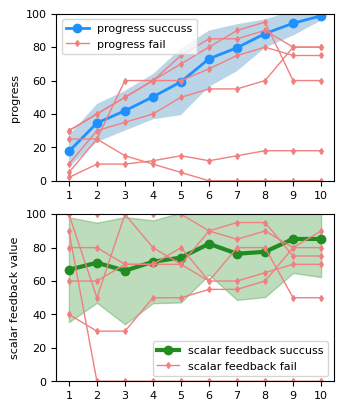

ttest p value:  2.6273984425078756e-06
bayesian factor:  4567.537609676606
98.76923076923077


In [130]:
#plot them together using subplots 2*1

fig_width = 7.16 /2  # width in inches
fig_height = (fig_width / 36) * 48 # height in inches to maintain 9:6 ratio for each subplot
fig, ax = plt.subplots(2, 1, figsize=(fig_width, fig_height))
ax[0].plot(mean_pro_suc, c = 'dodgerblue', marker='o', markersize=6, linewidth=2, label='progress succuss')
ax[0].fill_between(range(len(mean_pro_suc)), mean_pro_suc-std_pro_suc, mean_pro_suc+std_pro_suc, alpha=0.3)
#plot dots for the line
#ax.scatter(range(len(mean_pro_suc)), mean_pro_suc, c='dodgerblue', s=40)

# ax.plot(mean_pro_fail, 'r', label='progress_fail')
# ax.fill_between(range(len(mean_pro_fail)), mean_pro_fail-std_pro_fail, mean_pro_fail+std_pro_fail, alpha=0.2)

for pf in progresses_fail:
    ax[0].plot(pf, 'lightcoral', marker = "d", markersize = 3, linewidth=1, label='progress fail')


# remove duplicate labels
handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[0].legend(by_label.values(), by_label.keys())
ax[0].set_ylabel('progress')
ax[0].set_ylim(0, 100)
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(range(1, 11))
print(np.mean(std_pro_suc))


ax[1].plot(mean_pre_suc, c = 'forestgreen', marker='o', markersize=6, linewidth=3, label='scalar feedback succuss')
ax[1].fill_between(range(len(mean_pre_suc)), mean_pre_suc-std_pre_suc, mean_pre_suc+std_pre_suc, alpha=0.3, color = 'forestgreen' )
#plot dots for the line
#ax.scatter(range(len(mean_pre_suc)), mean_pre_suc, c='dodgerblue', s=40)

# ax.plot(mean_pre_fail, 'r', label='progress_fail')
# ax.fill_between(range(len(mean_pre_fail)), mean_pre_fail-std_pre_fail, mean_pre_fail+std_pre_fail, alpha=0.2)

for sf in scalars_fail:
    ax[1].plot(sf, 'lightcoral', marker = "d", markersize = 3, linewidth=1, label='scalar feedback fail')

# remove duplicate labels
handles, labels = ax[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax[1].legend(by_label.values(), by_label.keys())
ax[1].set_ylabel('scalar feedback value')
ax[1].set_ylim(0, 100)
# set x axis labels from 1 to 10
ax[1].set_xticks(range(10))
ax[1].set_xticklabels(range(1, 11))


plt.savefig('suc_fail.png', dpi = 1000, bbox_inches='tight')
plt.show()

# p values and bayesian factor for std_pro_suc and std_scal_suc
# p value
t, p = stats.ttest_ind(std_pro_suc, std_pre_suc)
print("ttest p value: ", p)
# bayesian factor
import pingouin as pg
bf = pg.bayesfactor_ttest(t, len(std_pro_suc), len(std_pre_suc))
print("bayesian factor: ", bf)

end_pro_suc = [progresses[i][-1] for i in range(len(progresses)) if progresses[i][-1] >=90]
print(np.mean(end_pro_suc))


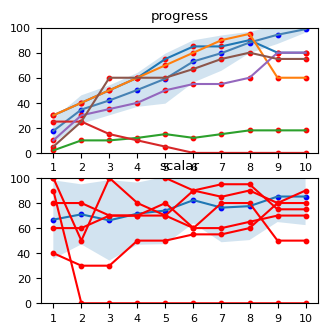

In [95]:
# then plot them in a 1 * 2 figure
fig_width = 7.16/2
fig_height = 3.58
fig, ax = plt.subplots(2, 1, figsize=(fig_width, fig_height))
ax[0].plot(mean_pro_suc, label='progress_suc', color = 'steelblue')
ax[0].fill_between(range(len(mean_pro_suc)), mean_pro_suc-std_pro_suc, mean_pro_suc+std_pro_suc, alpha=0.2)
#plot dots for the line
ax[0].scatter(range(len(mean_pro_suc)), mean_pro_suc, c='b', s=10)

for pf in progresses_fail:
    ax[0].plot(pf, '')
    ax[0].scatter(range(len(pf)), pf, c='r', s=10)
ax[0].set_xticks(range(10))
ax[0].set_xticklabels(range(1, 11))
ax[0].set_ylim(0, 100)
ax[0].set_title('progress')

ax[1].plot(mean_pre_suc, label='scalar_suc')
ax[1].fill_between(range(len(mean_pre_suc)), mean_pre_suc-std_pre_suc, mean_pre_suc+std_pre_suc, alpha=0.2)
#plot dots for the line
ax[1].scatter(range(len(mean_pre_suc)), mean_pre_suc, c='b', s=10)

for sf in scalars_fail:
    ax[1].plot(sf, 'r')
    ax[1].scatter(range(len(sf)), sf, c='r', s=10)
ax[1].set_xticks(range(10))
ax[1].set_xticklabels(range(1, 11))
ax[1].set_ylim(0, 100)
ax[1].set_title('scalar')

plt.show()


In [96]:
# calculate correlation between progress and scalar

correlation = []
correlation_delta = []

cnt = 0
for i in range(len(progresses)):
    delta_progress = np.diff(progresses[i], prepend=0)
    correlation.append(stats.pearsonr(progresses[i], scalars[i])[0])
    correlation_delta.append(stats.pearsonr(delta_progress, scalars[i])[0])

    print(correlation[i], correlation_delta[i], ind[i])
print(cnt)    


-0.19143598194795297 -0.07969391564748375 3
0.3263124748725924 0.2248396730773574 4
-0.7130048722166069 0.7946204331184232 6
0.11403643068285022 0.5971230851228435 7
-0.14979728666864772 0.2781213496812406 8
0.22744593538819702 0.23858263929744505 9
0.5557588881840329 0.41031723229927525 10
-0.6433767225300732 0.09874406319167053 11
-0.4530692022000925 0.5333371306920331 12
0.8245825185651541 0.20122117474722404 14
0.7161785972925521 0.3310423554409472 15
0.9350336908088064 -0.054702099710498386 16
0.4457493532601149 0.65 17
0.036417483695396324 0.7184972736575315 18
-0.20092069874947727 0.0702901946394417 19
0.5783517448238058 0.9316949906249121 20
0.9281738889351477 -0.6934060065887668 21
0.2270937237201126 -0.5306686305052323 22
0.8166304328183539 0.03980779429321307 23
-0.33551682864731047 0.39081944282254444 24
0.37357850495566575 0.735761825428898 25
nan nan 26
0.9485010043343515 0.09720288472879904 27
0.885500918639017 -0.19619472179398162 28
0.12782172359689659 0.15591863926906

C:\Users\Hang Yu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


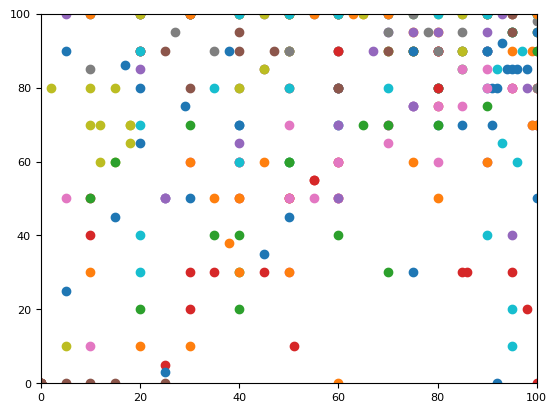

In [97]:
# plot progress and scalar using progress as x and scalar as y using dots
fig, ax = plt.subplots()
for i in range(len(scalars)):
    ax.scatter(progresses[i], scalars[i], label=str(ind[i]))
#ax.legend()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.show()


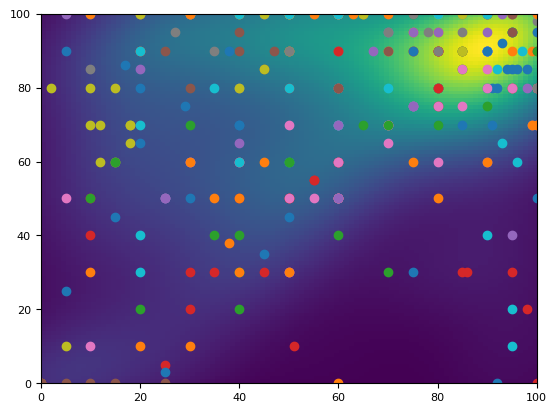

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

fig, ax = plt.subplots()

# Assuming 'progresses' and 'scalars' are lists of lists and 'ind' is a list of labels
all_progress = np.concatenate(progresses)
all_scalars = np.concatenate(scalars)

# Perform KDE on the combined data to get the density
xy = np.vstack([all_progress, all_scalars])
kde = gaussian_kde(xy)

# Create a grid over which to evaluate the KDE
xmin, xmax = 0, 100
ymin, ymax = 0, 100
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])

# Evaluate the KDE over the grid to get the density
zz = np.reshape(kde(grid_coords), xx.shape)

# Plot the gradient as a background
ax.imshow(np.rot90(zz), cmap='viridis', extent=[xmin, xmax, ymin, ymax], aspect='auto')

# Plot the individual points on top
for i in range(len(scalars)):
    ax.scatter(progresses[i], scalars[i], label=str(ind[i]))

# ax.legend() # Uncomment if you want to include a legend
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()


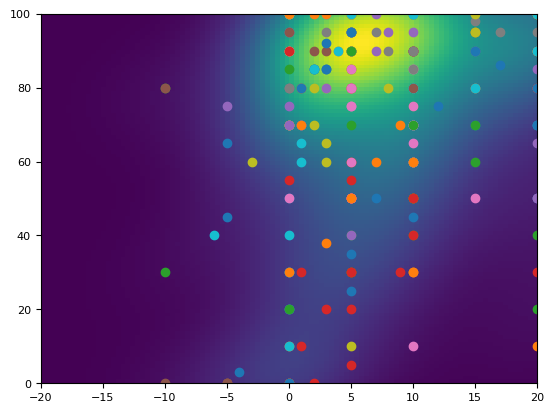

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

fig, ax = plt.subplots()
delta_progress = []
for i in range(len(scalars)):
    delta_progress.append(np.diff(progresses[i], prepend=0))
# Assuming 'progresses' and 'scalars' are lists of lists and 'ind' is a list of labels
all_progress = np.concatenate(delta_progress)
all_scalars = np.concatenate(scalars)

# Perform KDE on the combined data to get the density
xy = np.vstack([all_progress, all_scalars])
kde = gaussian_kde(xy)

# Create a grid over which to evaluate the KDE
xmin, xmax = -20, 20
ymin, ymax = 0, 100
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])

# Evaluate the KDE over the grid to get the density
zz = np.reshape(kde(grid_coords), xx.shape)

# Plot the gradient as a background
ax.imshow(np.rot90(zz), cmap='viridis', extent=[xmin, xmax, ymin, ymax], aspect='auto')

# Plot the individual points on top
for i in range(len(scalars)):
    ax.scatter(delta_progress[i], scalars[i], label=str(ind[i]))

# ax.legend() # Uncomment if you want to include a legend
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()


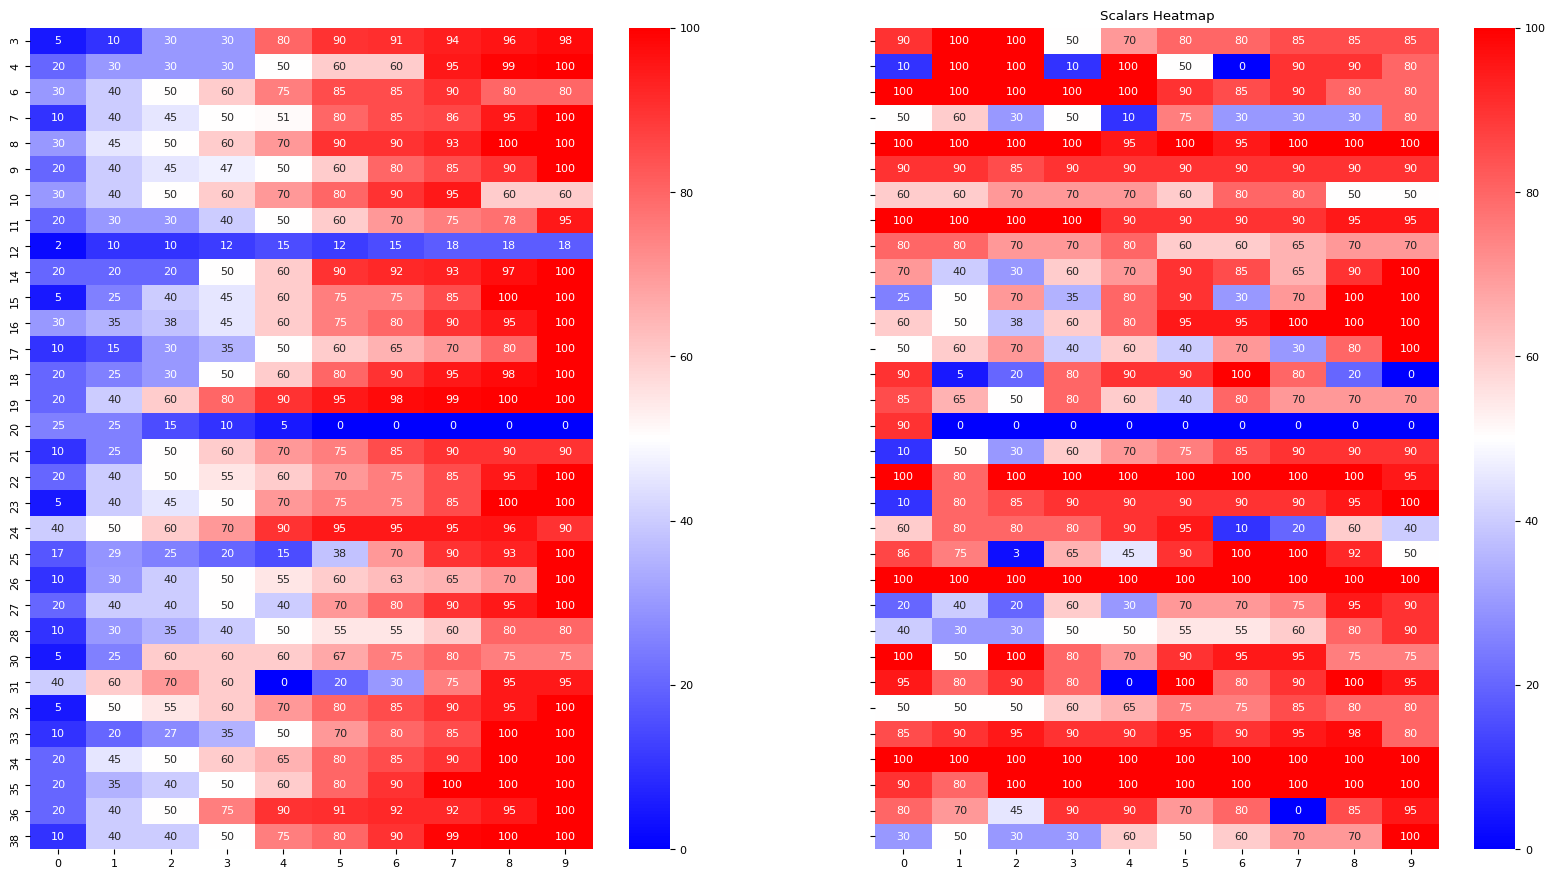

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def generate_side_by_side_heatmaps(data1, title1, data2, title2):
    # Convert data to numpy arrays for better handling by seaborn
    data_array1 = np.array(data1)
    data_array2 = np.array(data2)
    
    # Set up the matplotlib figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, len(data_array1) / 3), sharey=True)
    
    # Heatmap for the first dataset
    sns.heatmap(data_array1, ax=axes[0], annot=True, cmap="bwr", fmt="d", yticklabels=ind)
    #axes[0].set_title(title1)
    #change the y axis label to the user index
    
    
    # Heatmap for the second dataset
    sns.heatmap(data_array2, ax=axes[1], annot=True, cmap="bwr", fmt="d", yticklabels=ind, vmin=0, vmax=100)
    axes[1].set_title(title2)

    
    plt.show()

# Call the function with your progresses and scalars data
    
delta_progresses = []
for i in range(len(scalars)):
    delta_progresses.append(np.diff(progresses[i], prepend=0))
generate_side_by_side_heatmaps(progresses, "Progresses Heatmap", scalars, "Scalars Heatmap")



(0.0, 4.0)

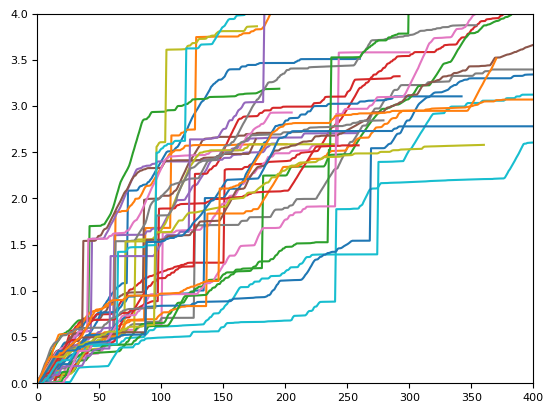

In [101]:
delta_moves = [abs(np.diff(trajectories[i],axis=0)) for i in range(len(trajectories))]
delta_moves = [np.sum(delta_moves[i], axis=1) for i in range(len(delta_moves))]
cumulative_moves = [np.cumsum(delta_moves[i]) for i in range(len(delta_moves))]

fig, ax = plt.subplots()
for i in range(len(cumulative_moves)):
    ax.plot(cumulative_moves[i], label=str(ind[i]))
ax.set_xlim(0, 400)
ax.set_ylim(0, 4)

262 261
511 510
197 196
459 458
260 259
191 190
302 301
416 415
179 178
565 564
344 343
203 202
621 620
294 293
194 193
178 177
207 206
356 355
241 240
880 879
442 441
415 414
830 829
261 260
416 415
1611 1610
528 527
281 280
362 361
369 368
566 565
372 371


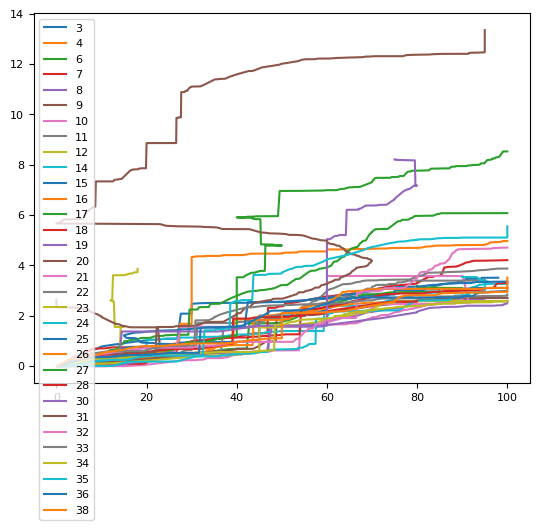

In [102]:
# prepend 0 to steps with deepcopy
import copy
ps = copy.deepcopy(progresses)
for i in range(len(progresses)):
    ps[i].insert(0, 0)
#create a list of continuous progress
# which turn the discrete progress into continuous progress by linear interpolation
continuous_progresses = []
for i in range(len(progresses)):
    continuous_progress = []
    for j in range(len(ps[i])-1):
        continuous_progress += list(np.linspace(ps[i][j], ps[i][j+1], steps[i][j]))
    continuous_progresses.append(continuous_progress)




# plot progress and delta moves using progress as x and delta moves as y using dots
fig, ax = plt.subplots()
for i in range(len(cumulative_moves)):
    print(len(continuous_progresses[i]), len(cumulative_moves[i]))
    ax.plot(continuous_progresses[i][1:], cumulative_moves[i], label=str(ind[i]))
ax.legend()

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3, 

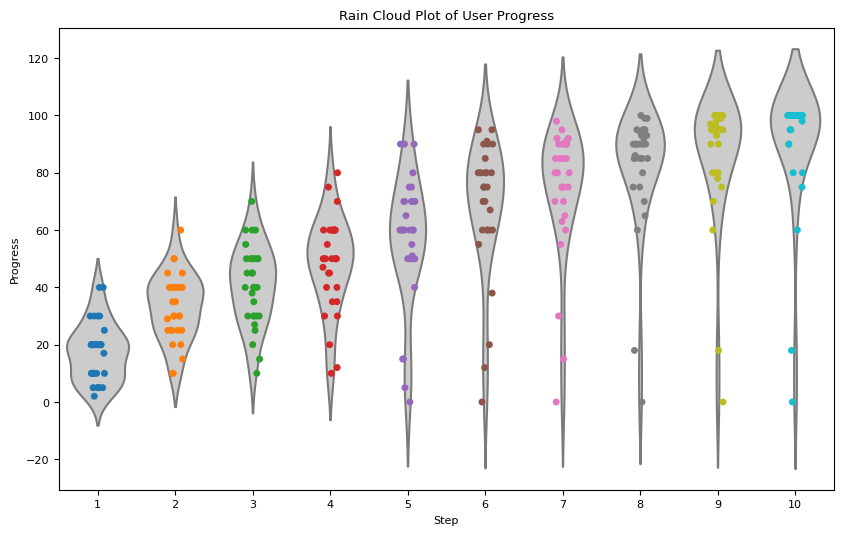

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
x_axis = []
for i in range(len(progresses)):
    x_axis.append(np.arange(1, len(progresses[i]) + 1))
print(x_axis)
data = {'Step': np.concatenate(x_axis), 'Progress': np.concatenate(progresses)}
df = pd.DataFrame(data)
# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Step', y='Progress', data=df, inner=None, color=".8")
sns.stripplot(x='Step', y='Progress', data=df, jitter=True, size=5, linewidth=0)

plt.title('Rain Cloud Plot of User Progress')
plt.xlabel('Step')
plt.ylabel('Progress')
plt.show()


[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 1,  2,  3, 

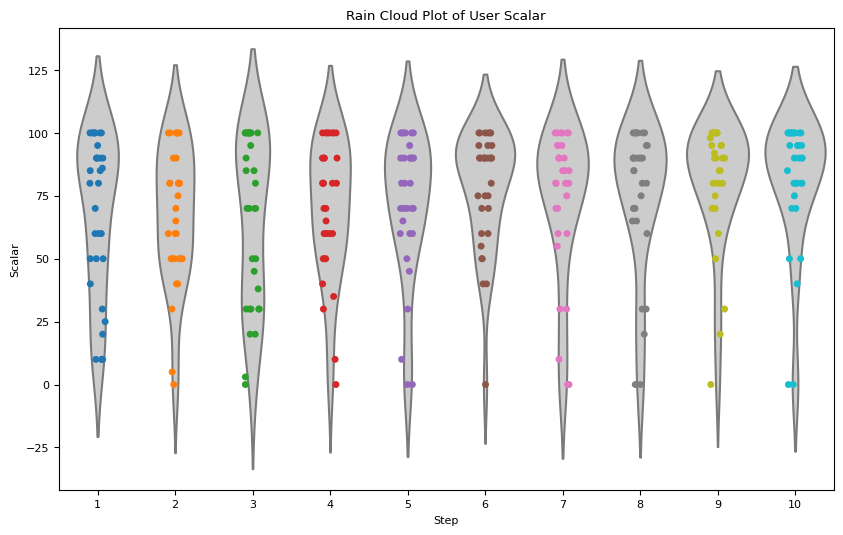

In [104]:
# do the same for scalar

x_axis = []
for i in range(len(scalars)):
    x_axis.append(np.arange(1, len(scalars[i]) + 1))
print(x_axis)
data = {'Step': np.concatenate(x_axis), 'Scalar': np.concatenate(scalars)}
df = pd.DataFrame(data)
# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Step', y='Scalar', data=df, inner=None, color=".8")
sns.stripplot(x='Step', y='Scalar', data=df, jitter=True, size=5, linewidth=0)

plt.title('Rain Cloud Plot of User Scalar')
plt.xlabel('Step')
plt.ylabel('Scalar')
plt.show()

    

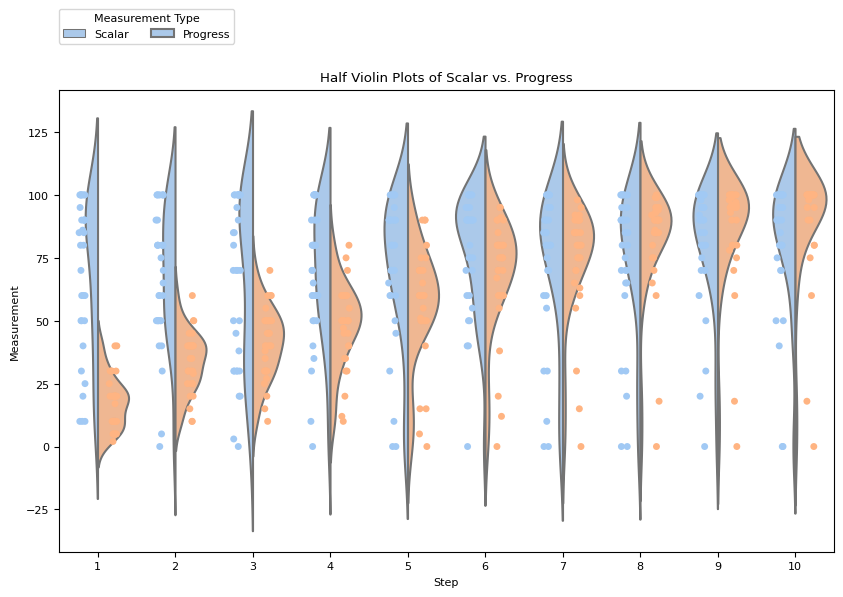

In [105]:
x_axis_scalar = []
x_axis_progress = []
for i in range(len(scalars)):
    x_axis_scalar.append(np.arange(1, len(scalars[i]) + 1))
    x_axis_progress.append(np.arange(1, len(progresses[i]) + 1))

# Create DataFrames
data_scalar = {'Step': np.concatenate(x_axis_scalar), 'Measurement': np.concatenate(scalars), 'Type': 'Scalar'}
data_progress = {'Step': np.concatenate(x_axis_progress), 'Measurement': np.concatenate(progresses), 'Type': 'Progress'}

# Combine into a single DataFrame
df_scalar = pd.DataFrame(data_scalar)
df_progress = pd.DataFrame(data_progress)
df_combined = pd.concat([df_scalar, df_progress])

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Step', y='Measurement', hue='Type', data=df_combined, split=True, inner=None, palette="pastel")
sns.stripplot(x='Step', y='Measurement', hue='Type', data=df_combined, jitter=True, size=5, linewidth=0, dodge=True, palette="pastel")

plt.title('Half Violin Plots of Scalar vs. Progress')
plt.xlabel('Step')
plt.ylabel('Measurement')
#make my legend horizontal
plt.legend(title='Measurement Type', loc = [0,1.1], labels=['Scalar', 'Progress'], ncol=2)

plt.show()